In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### FILL MACROS

In [7]:
macro = pd.read_excel('/kaggle/input/dtsetnpl/dtset.xlsx', sheet_name='macros')

macro.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


time        IR     GDP     IIP  INF     CPI      UN  M2
0  2012q1  0.138700  0.0464  0.0650  NaN  0.1415  0.0222 NaN
1  2012q2  0.113667  0.0480  0.0802  NaN  0.0690  0.0218 NaN
2  2012q3  0.092067  0.0505  0.0965  NaN  0.0648  0.0229 NaN
3  2012q4  0.093667  0.0544  0.0593  NaN  0.0681  0.0212 NaN
4  2013q1  0.090000  0.0476  0.0516  NaN  0.0664  0.0227 NaN

In [8]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    51 non-null     object 
 1   IR      51 non-null     float64
 2   GDP     51 non-null     float64
 3   IIP     51 non-null     float64
 4   INF     38 non-null     float64
 5   CPI     51 non-null     float64
 6   UN      51 non-null     float64
 7   M2      46 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [9]:
zero_counts = (macro == 0).sum()
nan_counts = macro.isna().sum()

checking = pd.DataFrame({
    "C·ªôt": macro.columns,
    "S·ªë gi√° tr·ªã NaN": nan_counts.values,
    "S·ªë gi√° tr·ªã 0": zero_counts.values
})

checking

C·ªôt  S·ªë gi√° tr·ªã NaN  S·ªë gi√° tr·ªã 0
0  time               0             0
1    IR               0             0
2   GDP               0             0
3   IIP               0             0
4   INF              13             0
5   CPI               0             1
6    UN               0             0
7    M2               5             0

In [10]:
macro['CPI'] = macro['CPI'].replace(0, macro['CPI'].mean())

macro['M2'] = macro['M2'].fillna(macro['M2'].mean())

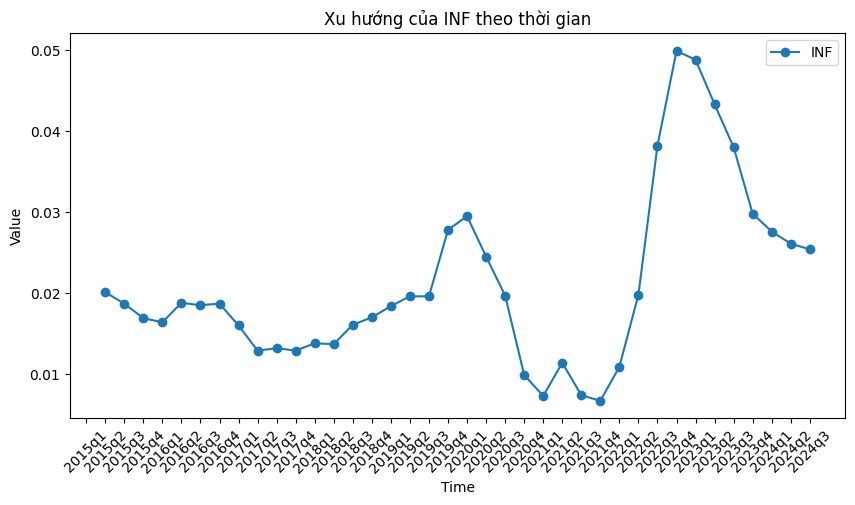

In [11]:
# Ki·ªÉm tra xu h∆∞·ªõng c·ªßa INF 
plt.figure(figsize=(10, 5))

plt.plot(macro['time'], macro['INF'], marker='o', linestyle='-', label='INF')
# plt.plot(macro['time'], macro['M2'], marker='s', linestyle='--', label='M2')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Xu h∆∞·ªõng c·ªßa INF theo th·ªùi gian')
plt.legend()
plt.xticks(rotation=45)
plt.show()

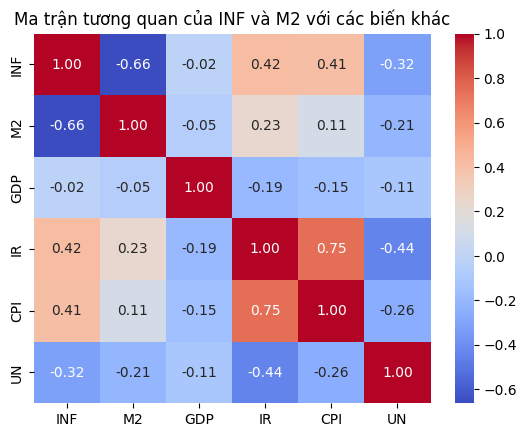

In [12]:
corr_matrix = macro[['INF', 'M2', 'GDP', 'IR', 'CPI', 'UN']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma tr·∫≠n t∆∞∆°ng quan c·ªßa INF v√† M2 v·ªõi c√°c bi·∫øn kh√°c')
plt.show()

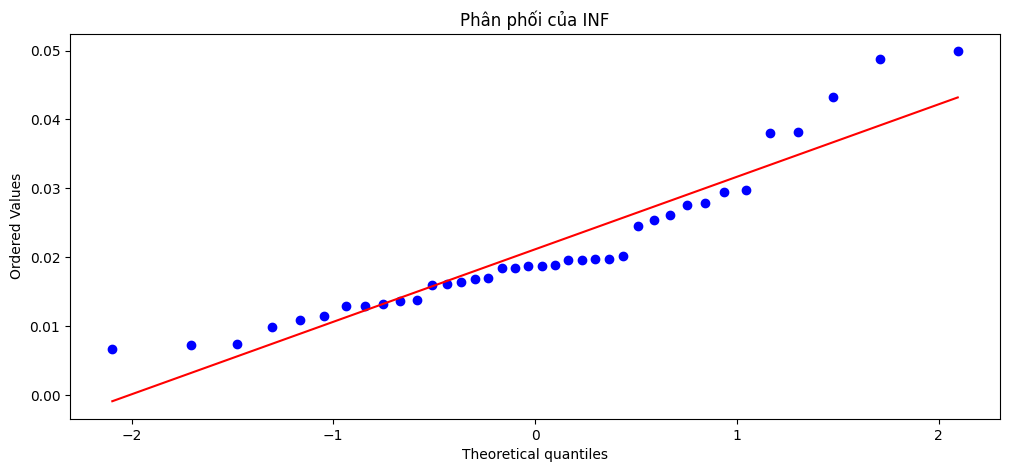

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))

stats.probplot(macro['INF'].dropna(), dist="norm", plot=ax)
ax.set_title('Ph√¢n ph·ªëi c·ªßa INF')

plt.show()

In [14]:
macro = macro.drop(columns=['time'], errors='ignore')

macro.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


IR     GDP     IIP  INF     CPI      UN        M2
0  0.138700  0.0464  0.0650  NaN  0.1415  0.0222  0.142546
1  0.113667  0.0480  0.0802  NaN  0.0690  0.0218  0.142546
2  0.092067  0.0505  0.0965  NaN  0.0648  0.0229  0.142546
3  0.093667  0.0544  0.0593  NaN  0.0681  0.0212  0.142546
4  0.090000  0.0476  0.0516  NaN  0.0664  0.0227  0.142546

In [15]:
# INF c√≥ t∆∞∆°ng quan v·ªõi IR (0.42) v√† CPI (0.41), c√≥ th·ªÉ d√πng m√¥ h√¨nh ƒë·ªÉ d·ª± b√°o gi√° tr·ªã INF b·ªã thi·∫øu.

from sklearn.linear_model import LinearRegression

# L·ªçc c√°c h√†ng c√≥ d·ªØ li·ªáu ƒë·∫ßy ƒë·ªß
macro_full = macro.dropna(subset=['INF', 'M2', 'IR', 'CPI'])

# X√°c ƒë·ªãnh bi·∫øn ƒë·ªôc l·∫≠p v√† bi·∫øn ph·ª• thu·ªôc
X = macro_full[['M2', 'IR', 'CPI']]
y = macro_full['INF']

# Hu·∫•n luy·ªán m√¥ h√¨nh h·ªìi quy
model = LinearRegression()
model.fit(X, y)

# D·ª± ƒëo√°n INF cho c√°c h√†ng b·ªã thi·∫øu
macro_missing = macro[macro['INF'].isna()].copy()

# X·ª≠ l√Ω NaN trong bi·∫øn ƒë·∫ßu v√†o (M2, IR, CPI)
macro_missing[['M2', 'IR', 'CPI']] = macro_missing[['M2', 'IR', 'CPI']].fillna(macro.median())

# D·ª± ƒëo√°n v√† ƒëi·ªÅn INF
macro.loc[macro['INF'].isna(), 'INF'] = model.predict(macro_missing[['M2', 'IR', 'CPI']])

In [16]:
macro.head()

IR     GDP     IIP       INF     CPI      UN        M2
0  0.138700  0.0464  0.0650  0.077932  0.1415  0.0222  0.142546
1  0.113667  0.0480  0.0802  0.051799  0.0690  0.0218  0.142546
2  0.092067  0.0505  0.0965  0.043300  0.0648  0.0229  0.142546
3  0.093667  0.0544  0.0593  0.044649  0.0681  0.0212  0.142546
4  0.090000  0.0476  0.0516  0.042969  0.0664  0.0227  0.142546

In [17]:
macro.to_csv("/kaggle/working/filled_macros.csv", index=False)

### FILL MICROS

In [18]:
micro = pd.read_excel('/kaggle/input/dtsetnpl/dtset.xlsx', sheet_name='data')

micro.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


bank  quarterly  year    time     NPL        IR     GDP     IIP  INF  \
0  ABB          1  2012  2012q1  0.0325  0.138700  0.0464  0.0650  NaN   
1  ABB          2  2012  2012q2  0.0325  0.113667  0.0480  0.0802  NaN   
2  ABB          3  2012  2012q3  0.0325  0.092067  0.0505  0.0965  NaN   
3  ABB          4  2012  2012q4  0.0290  0.093667  0.0544  0.0593  NaN   
4  ABB          1  2013  2013q1  0.0325  0.090000  0.0476  0.0516  NaN   

      CPI      UN  M2     PCR     LTA     ROA     ROE     LDR  
0  0.1415  0.0222 NaN  0.0160  0.0000  0.0074  0.0655  0.0000  
1  0.0690  0.0218 NaN  0.0153  0.3997  0.0000  0.0000  0.5473  
2  0.0648  0.0229 NaN  0.0160  0.0000  0.0074  0.0655  0.0000  
3  0.0681  0.0212 NaN  0.0221  0.3986  0.0091  0.0830  0.5047  
4  0.0664  0.0227 NaN  0.0221  0.4076  0.0088  0.0830  1.6140

In [19]:
zero_counts = (micro == 0).sum()
nan_counts = micro.isna().sum()

checking = pd.DataFrame({
    "C·ªôt": micro.columns,
    "S·ªë gi√° tr·ªã NaN": nan_counts.values,
    "S·ªë gi√° tr·ªã 0": zero_counts.values
})

checking

C·ªôt  S·ªë gi√° tr·ªã NaN  S·ªë gi√° tr·ªã 0
0        bank               0             0
1   quarterly               0             0
2        year               0             0
3        time               0             0
4         NPL               0             0
5          IR               0             0
6         GDP               0             0
7         IIP               0             0
8         INF             299             0
9         CPI               0            23
10         UN               0             0
11         M2             115             0
12        PCR               2             0
13        LTA               2            16
14        ROA               2            29
15        ROE               2            29
16        LDR               2            22

In [20]:
cols_to_check = ['PCR', 'LTA', 'ROA', 'ROE', 'LDR']

# Duy·ªát qua t·ª´ng bi·∫øn v√† t·∫°o b·∫£ng ri√™ng
for col in cols_to_check:
    # L·ªçc c√°c ng√¢n h√†ng c√≥ NaN ho·∫∑c 0 trong bi·∫øn ƒë√≥
    filtered_data = micro[micro[col].isna() | (micro[col] == 0)]
    
    # Nh√≥m theo ng√¢n h√†ng v√† ƒë·∫øm s·ªë l∆∞·ª£ng NaN, s·ªë l∆∞·ª£ng 0
    summary_table = filtered_data.groupby('bank')[col].apply(lambda x: pd.Series({
        'S·ªë l∆∞·ª£ng NaN': x.isna().sum(),
        'S·ªë l∆∞·ª£ng 0': (x == 0).sum()
    })).reset_index()
    
    # Hi·ªÉn th·ªã b·∫£ng
    print(f"Bi·∫øn {col}:\n")
    print(summary_table)
    print("\n" + "="*50 + "\n")

Bi·∫øn PCR:

  bank       level_1  PCR
0  BID  S·ªë l∆∞·ª£ng NaN    2
1  BID    S·ªë l∆∞·ª£ng 0    0


Bi·∫øn LTA:

   bank       level_1  LTA
0   ABB  S·ªë l∆∞·ª£ng NaN    0
1   ABB    S·ªë l∆∞·ª£ng 0    2
2   BID  S·ªë l∆∞·ª£ng NaN    2
3   BID    S·ªë l∆∞·ª£ng 0    0
4   KLB  S·ªë l∆∞·ª£ng NaN    0
5   KLB    S·ªë l∆∞·ª£ng 0    1
6   SGB  S·ªë l∆∞·ª£ng NaN    0
7   SGB    S·ªë l∆∞·ª£ng 0    1
8   SSB  S·ªë l∆∞·ª£ng NaN    0
9   SSB    S·ªë l∆∞·ª£ng 0    3
10  TCB  S·ªë l∆∞·ª£ng NaN    0
11  TCB    S·ªë l∆∞·ª£ng 0    1
12  TPB  S·ªë l∆∞·ª£ng NaN    0
13  TPB    S·ªë l∆∞·ª£ng 0    3
14  VBB  S·ªë l∆∞·ª£ng NaN    0
15  VBB    S·ªë l∆∞·ª£ng 0    4
16  VIB  S·ªë l∆∞·ª£ng NaN    0
17  VIB    S·ªë l∆∞·ª£ng 0    1


Bi·∫øn ROA:

   bank       level_1  ROA
0   ABB  S·ªë l∆∞·ª£ng NaN    0
1   ABB    S·ªë l∆∞·ª£ng 0    3
2   BID  S·ªë l∆∞·ª£ng NaN    2
3   BID    S·ªë l∆∞·ª£ng 0    0
4   KLB  S·ªë l∆∞·ª£ng NaN    0
5   KLB    S·ªë l∆∞·ª£ng 0    2
6   MSB  S·ªë l∆∞·ª£ng NaN    0
7   MSB    S·ªë

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



üìå Ki·ªÉm tra bi·∫øn: PCR - C√°c ng√¢n h√†ng c·∫ßn ki·ªÉm tra: ['BID']



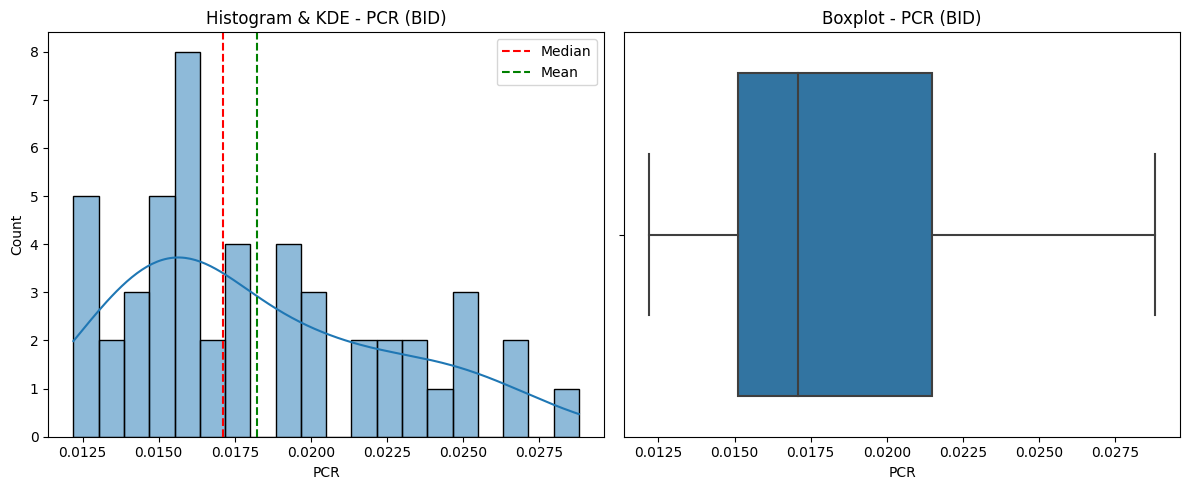


üìå Ki·ªÉm tra bi·∫øn: LTA - C√°c ng√¢n h√†ng c·∫ßn ki·ªÉm tra: ['ABB' 'BID' 'KLB' 'SGB' 'SSB' 'TCB' 'TPB' 'VBB' 'VIB']



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


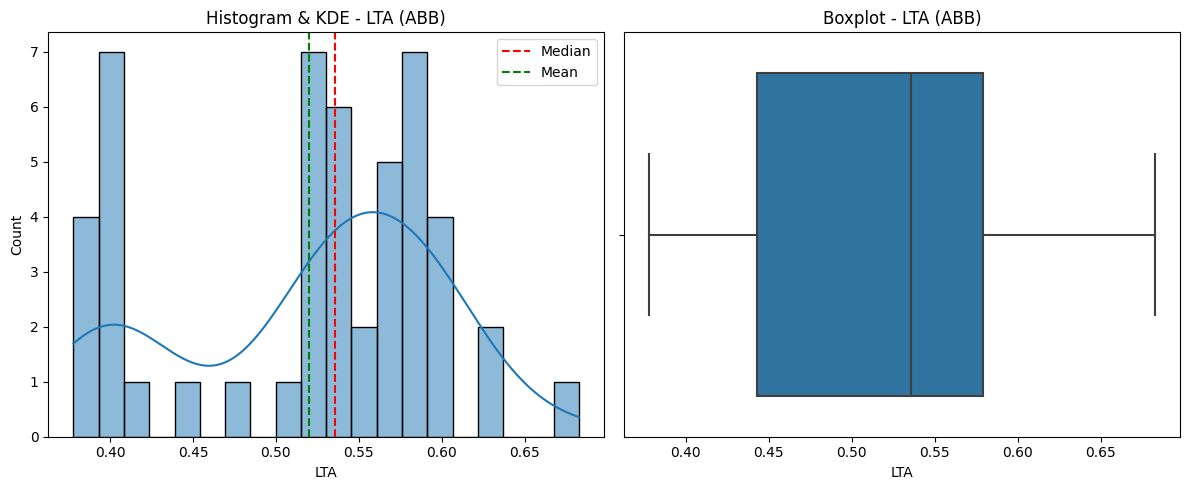

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


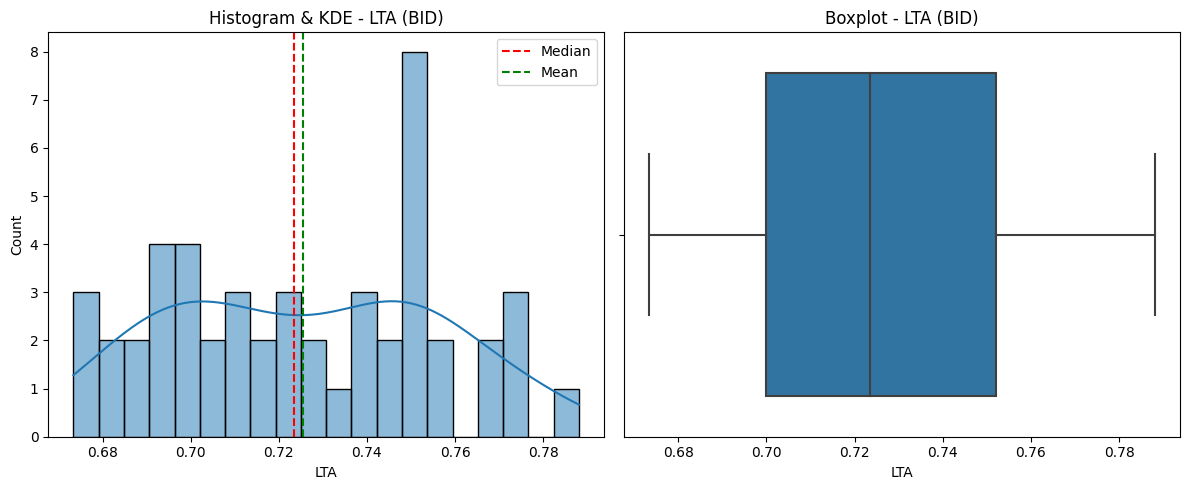

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


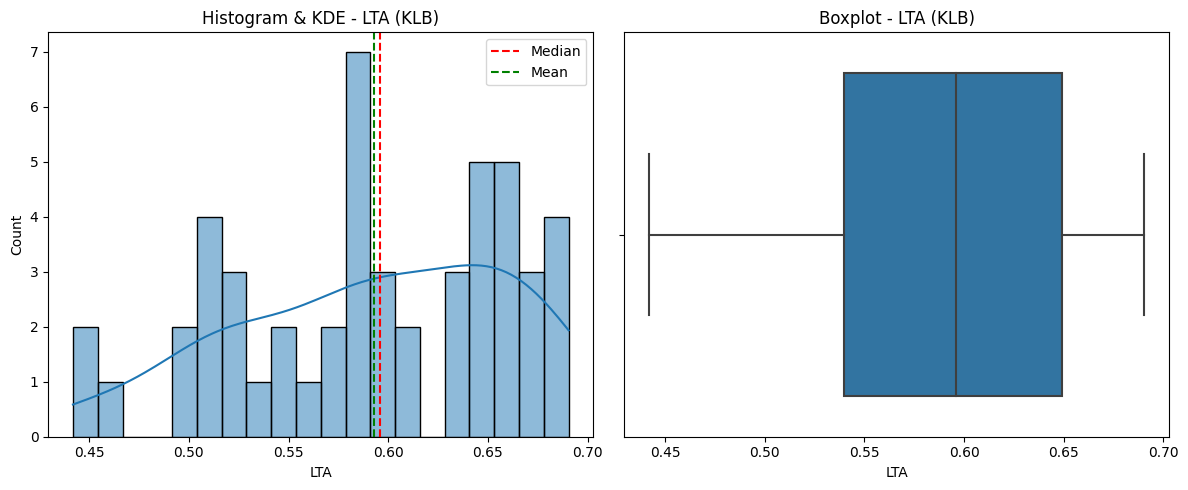

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


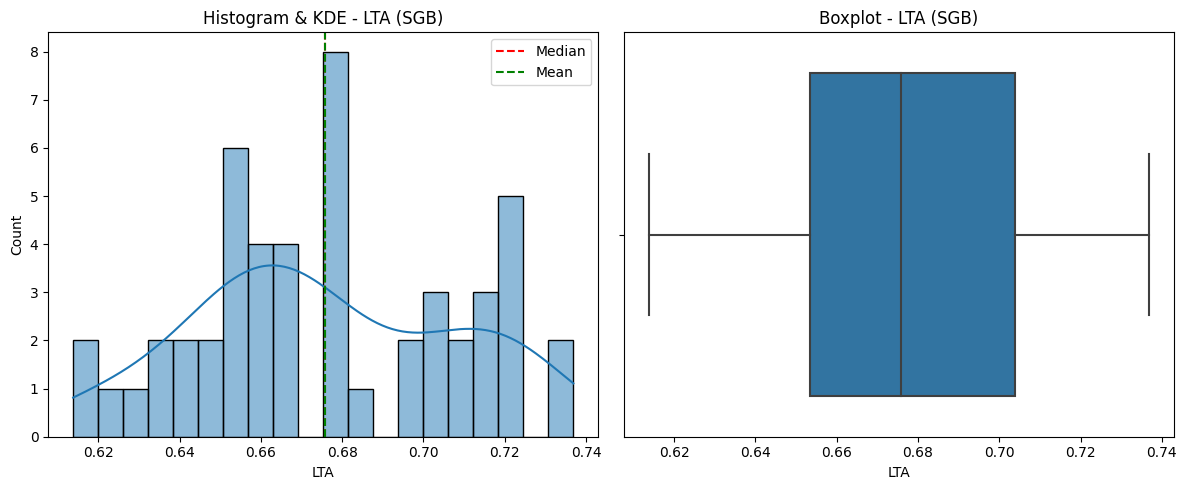

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


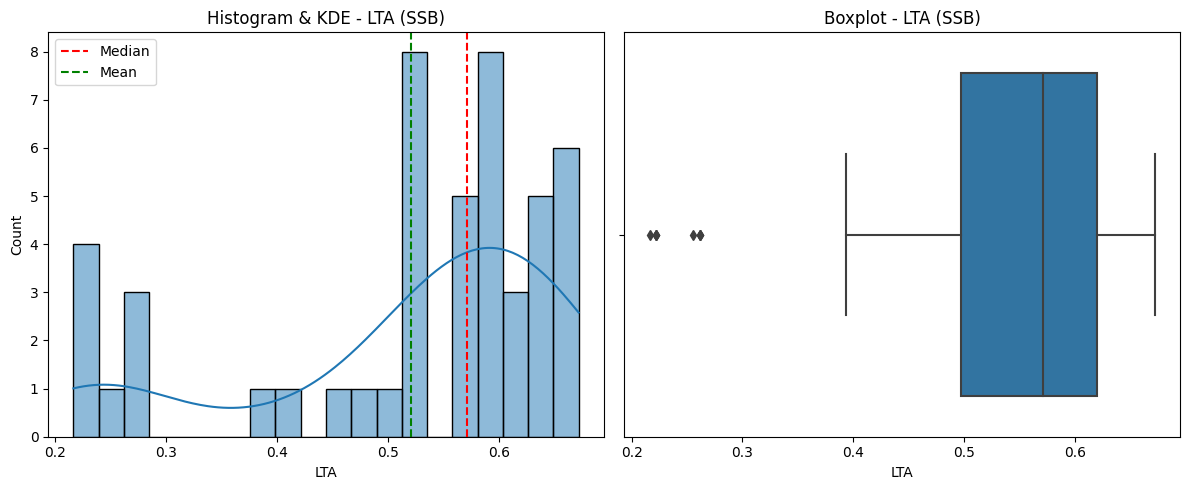

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


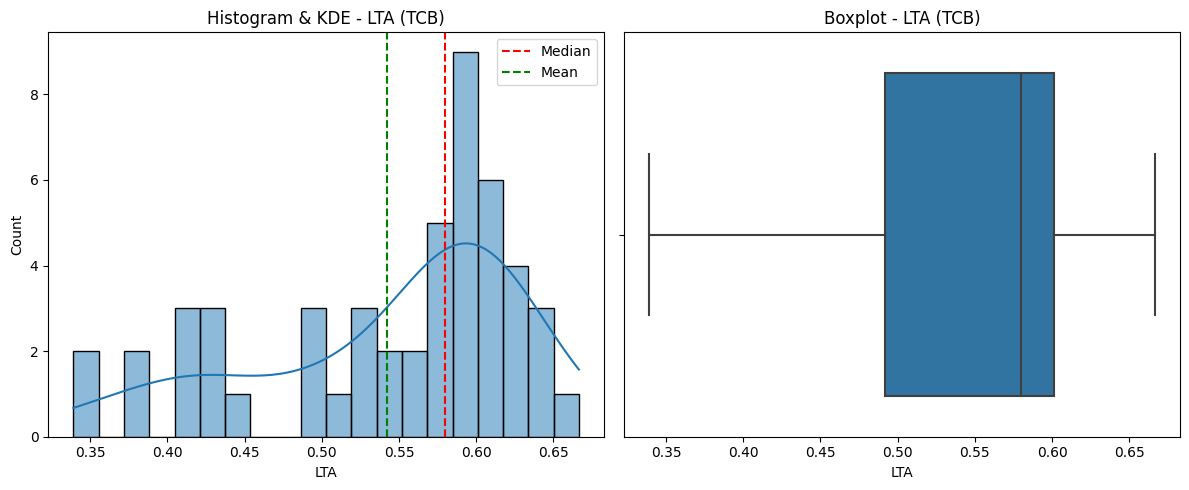

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


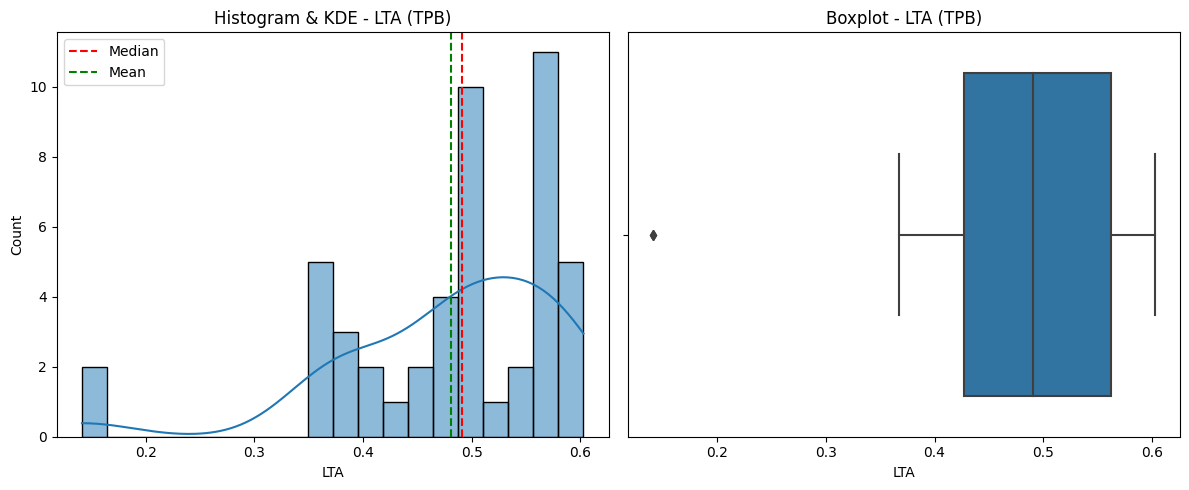

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


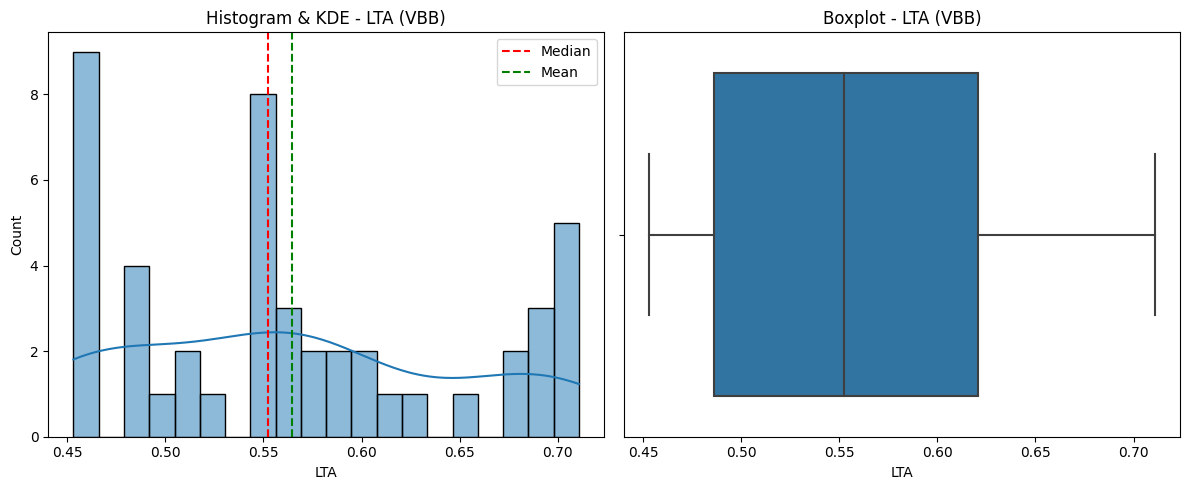

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


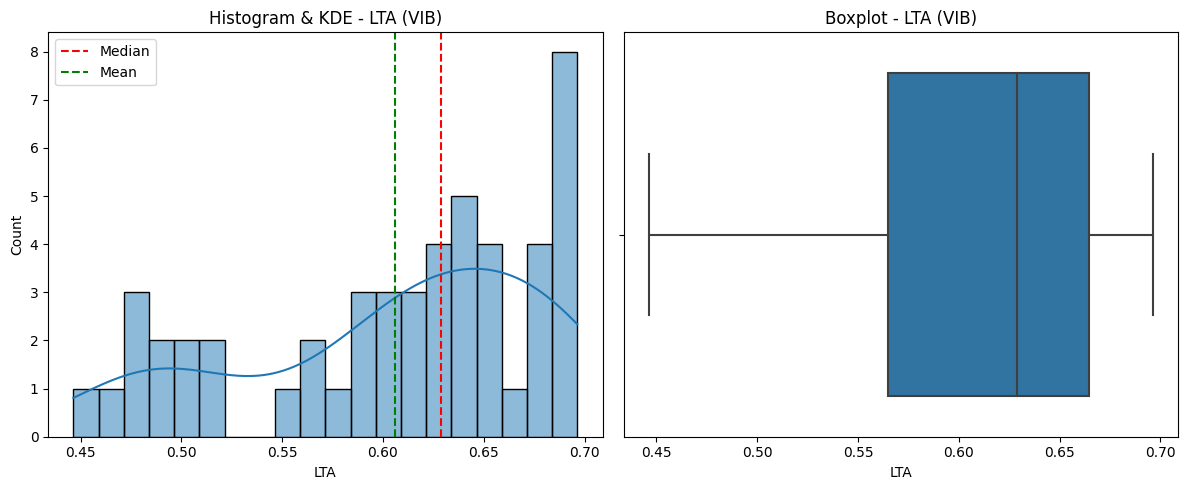


üìå Ki·ªÉm tra bi·∫øn: ROA - C√°c ng√¢n h√†ng c·∫ßn ki·ªÉm tra: ['ABB' 'BID' 'KLB' 'MSB' 'NAB' 'OCB' 'PGB' 'SGB' 'TCB' 'TPB' 'VIB' 'VPB']



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


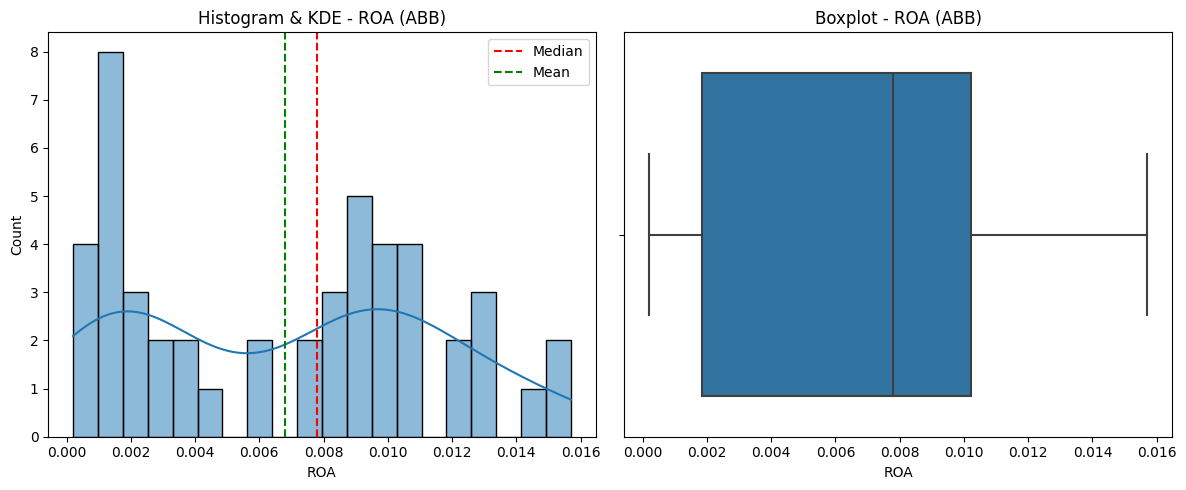

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


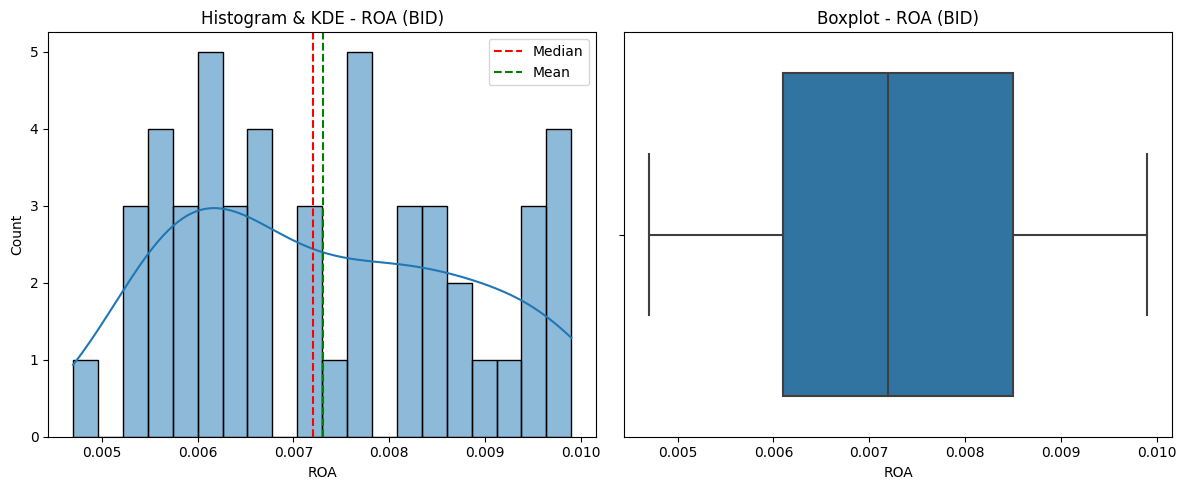

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


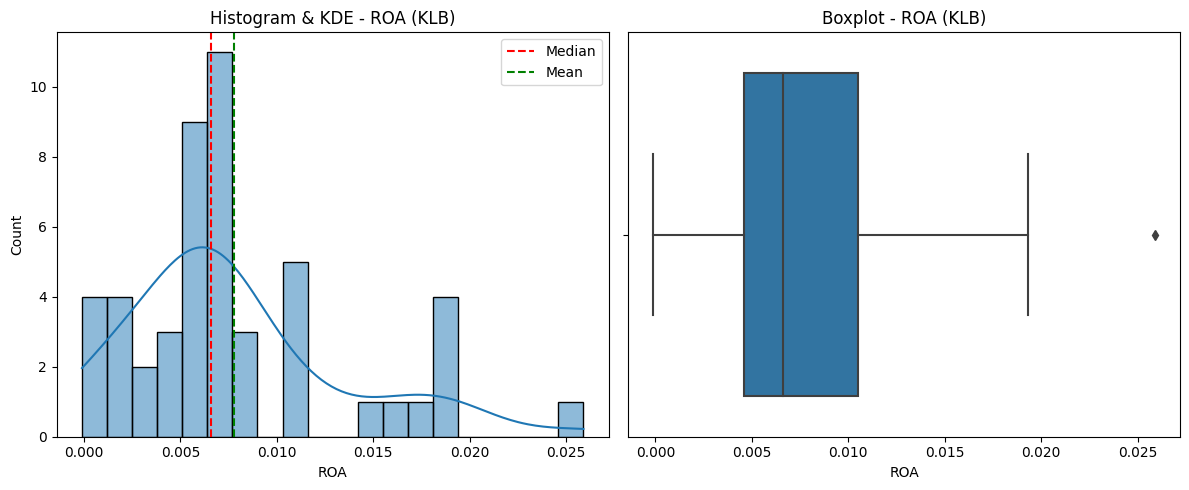

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


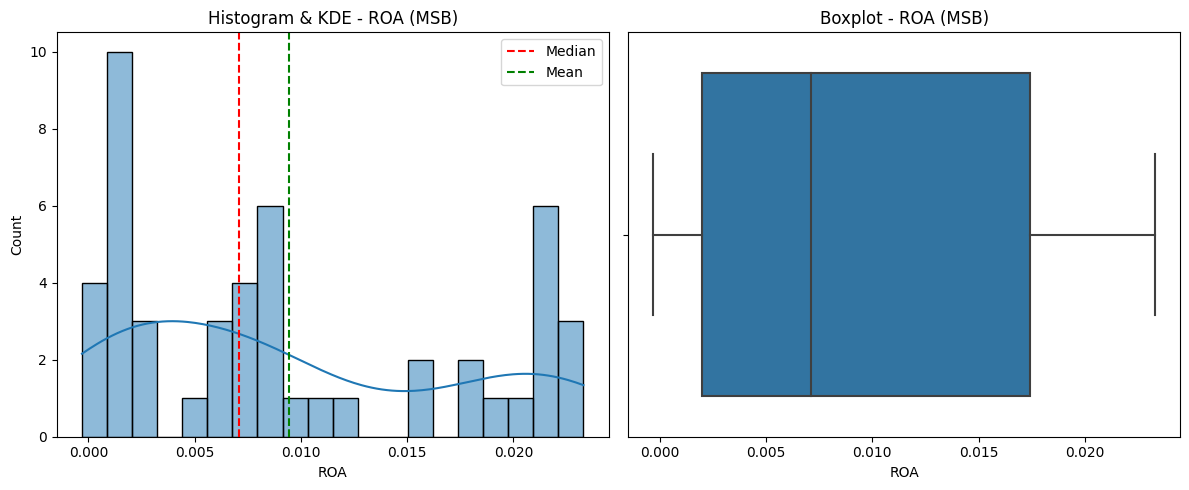

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


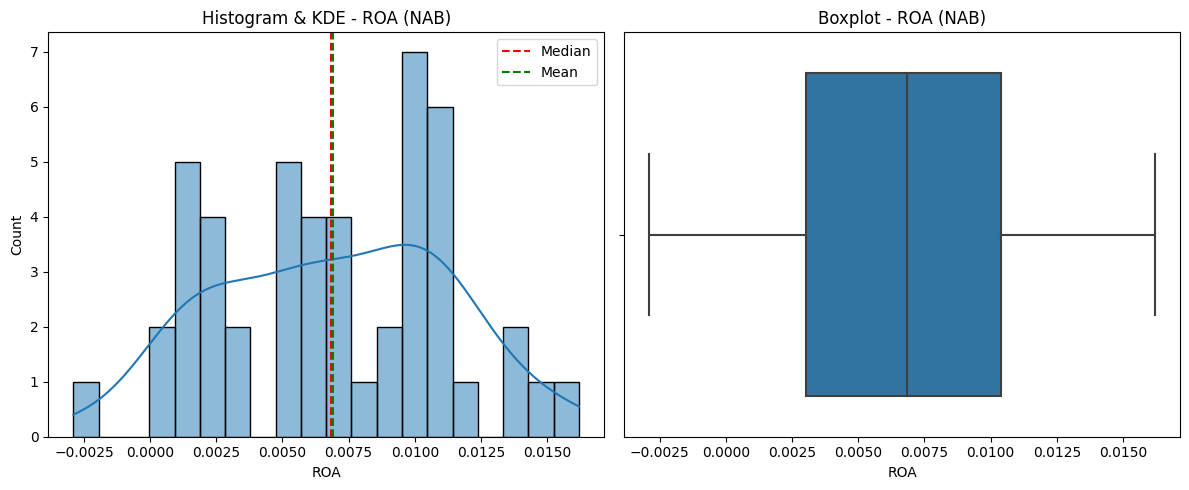

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


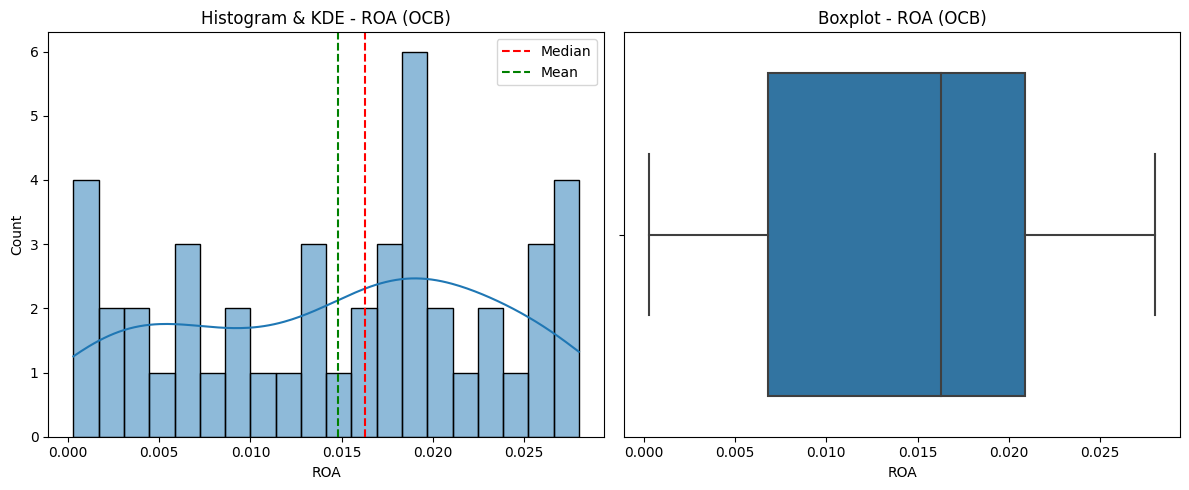

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


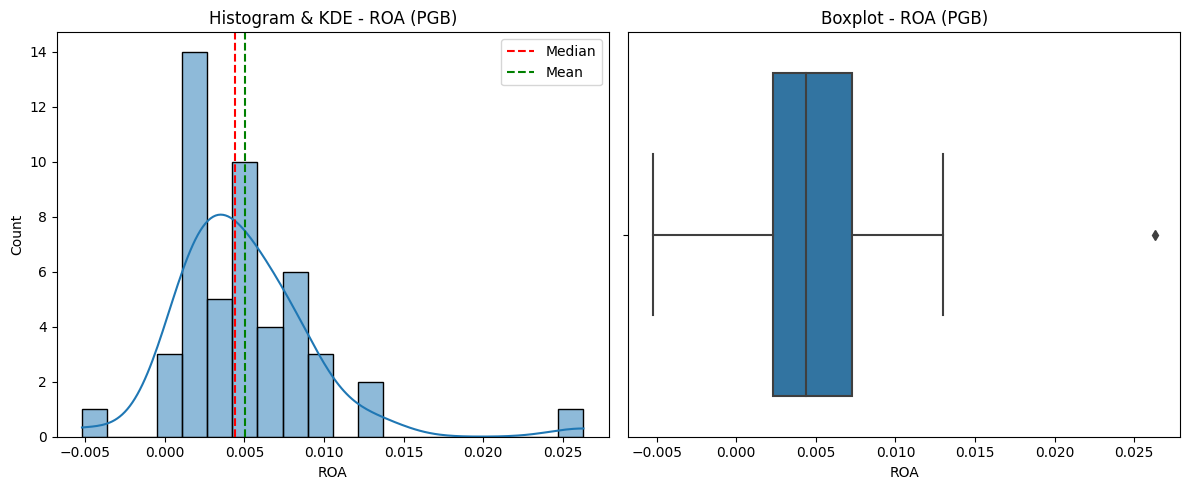

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


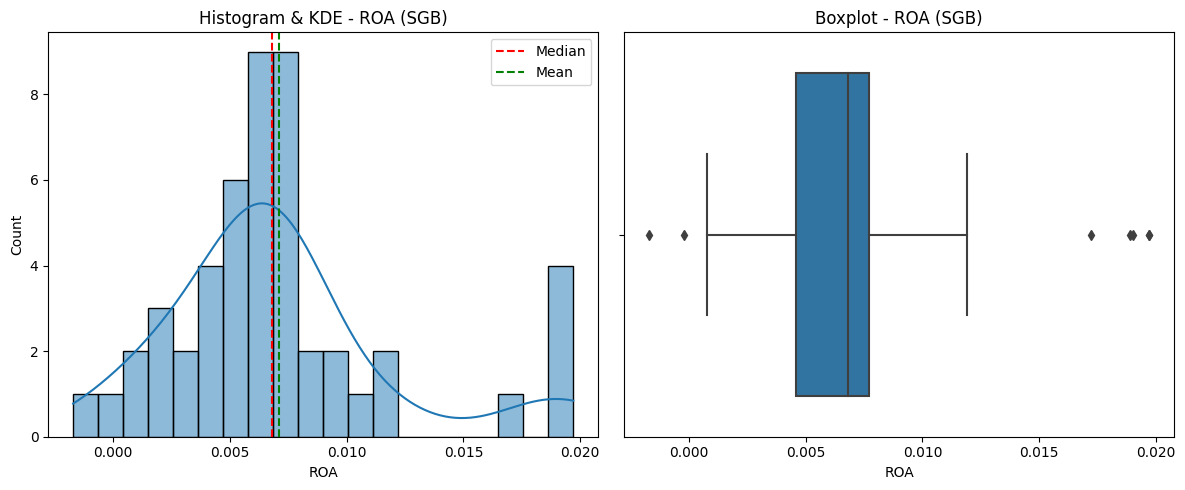

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


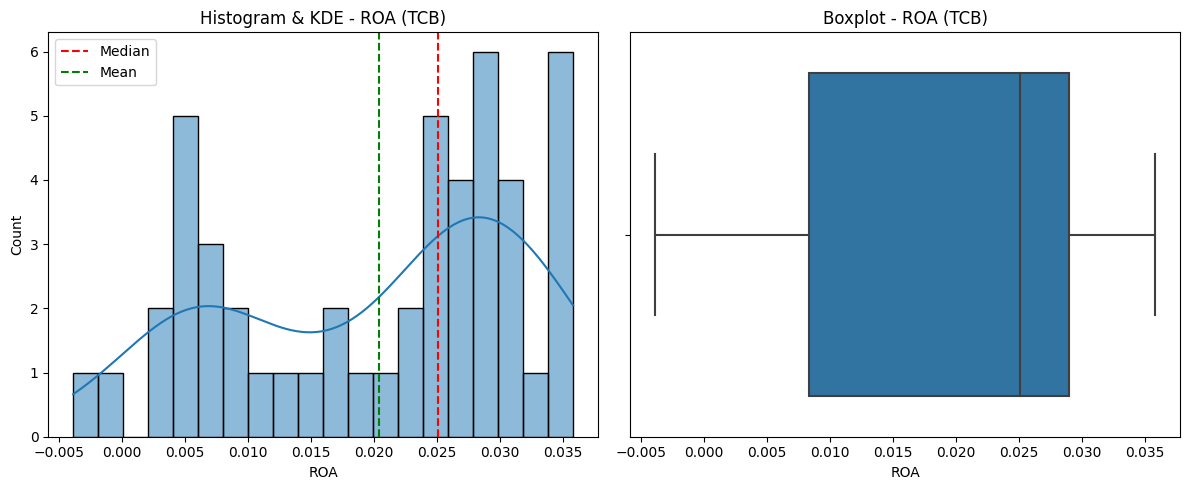

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


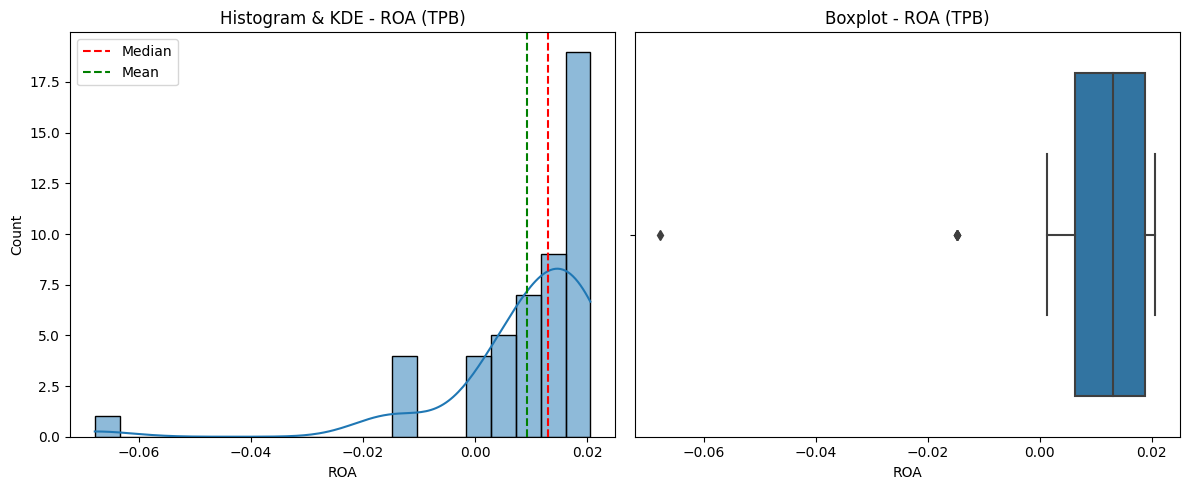

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


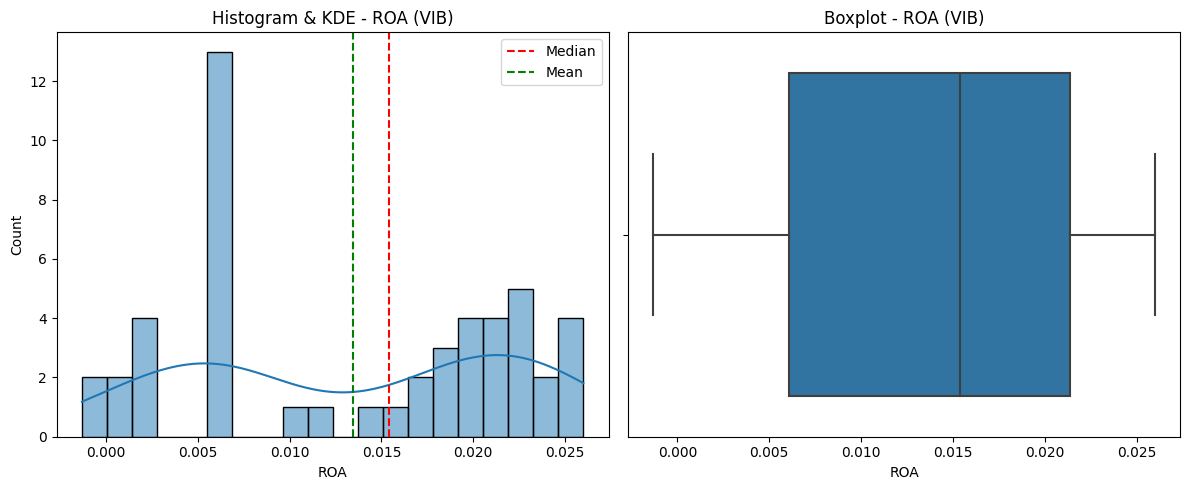

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


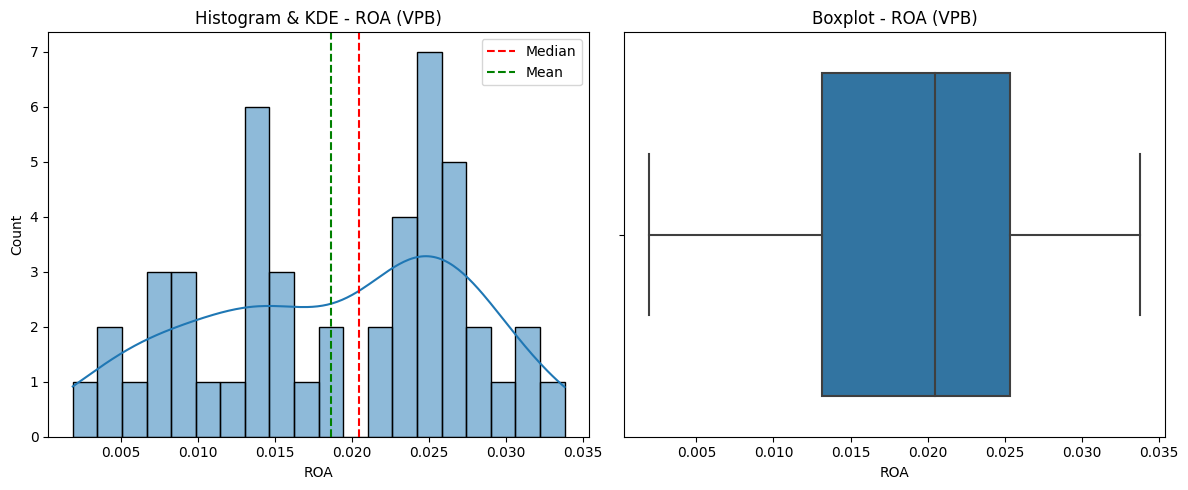


üìå Ki·ªÉm tra bi·∫øn: ROE - C√°c ng√¢n h√†ng c·∫ßn ki·ªÉm tra: ['ABB' 'BID' 'KLB' 'MSB' 'NAB' 'OCB' 'PGB' 'SGB' 'TCB' 'TPB' 'VIB' 'VPB']



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


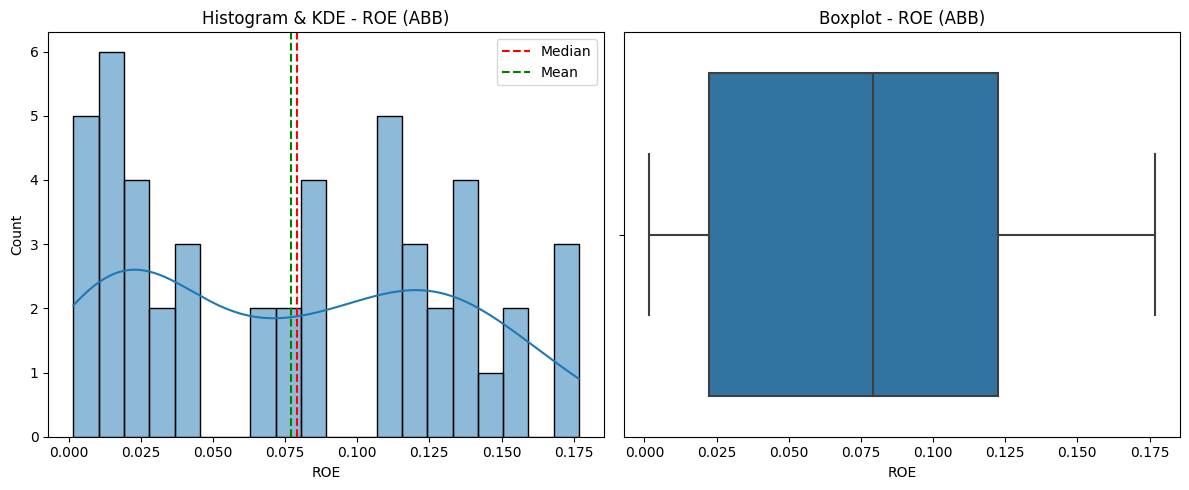

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


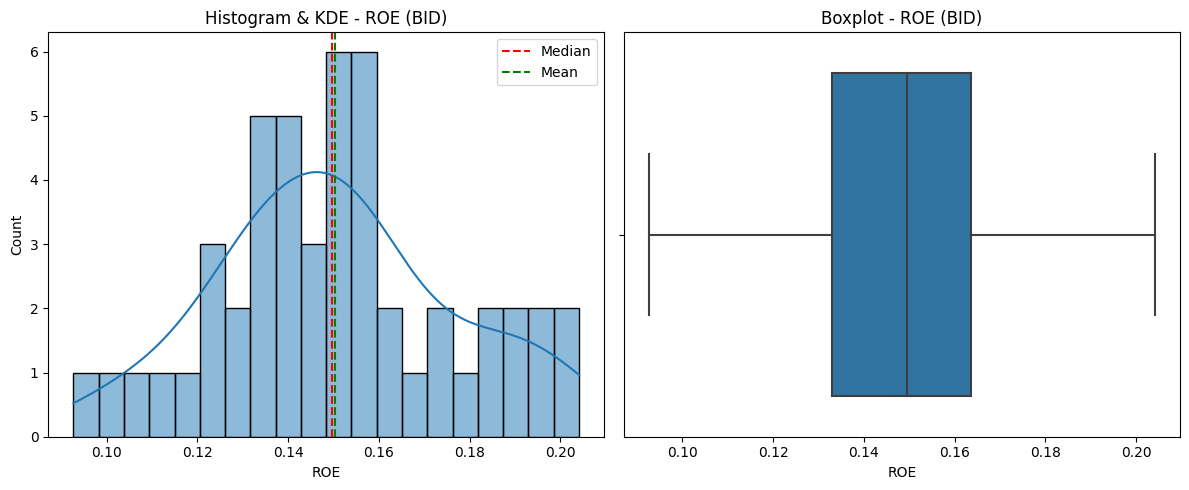

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


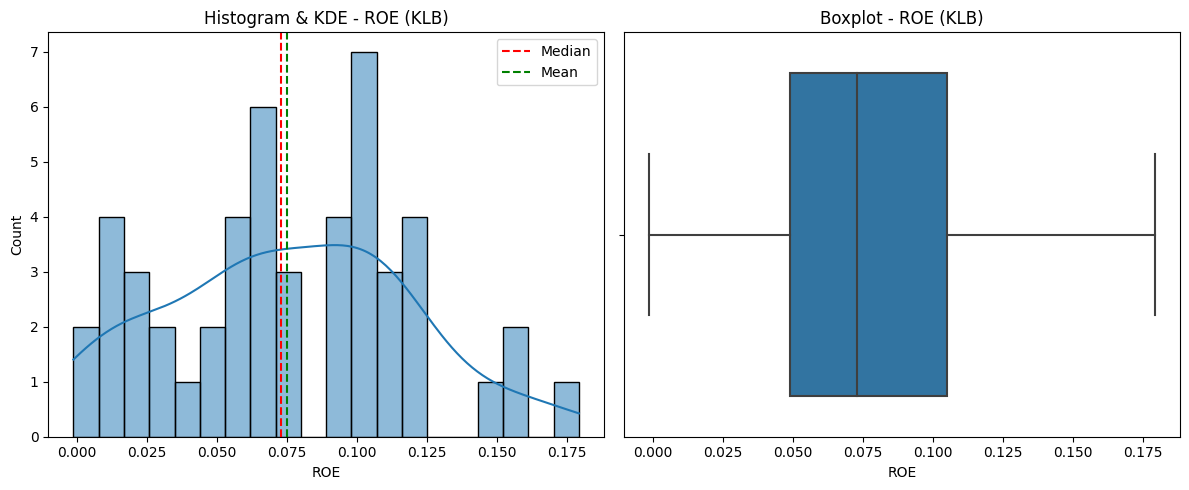

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


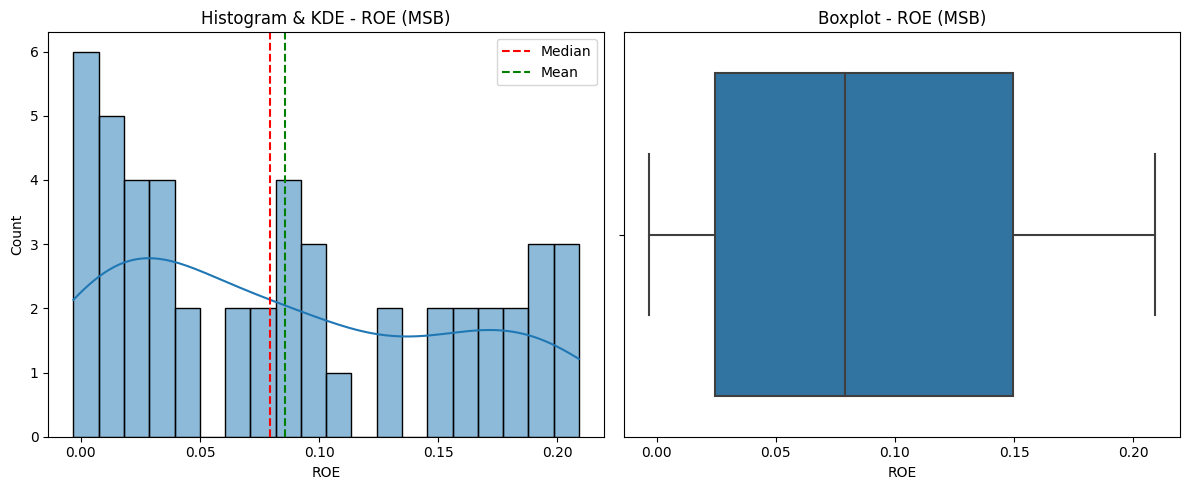

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


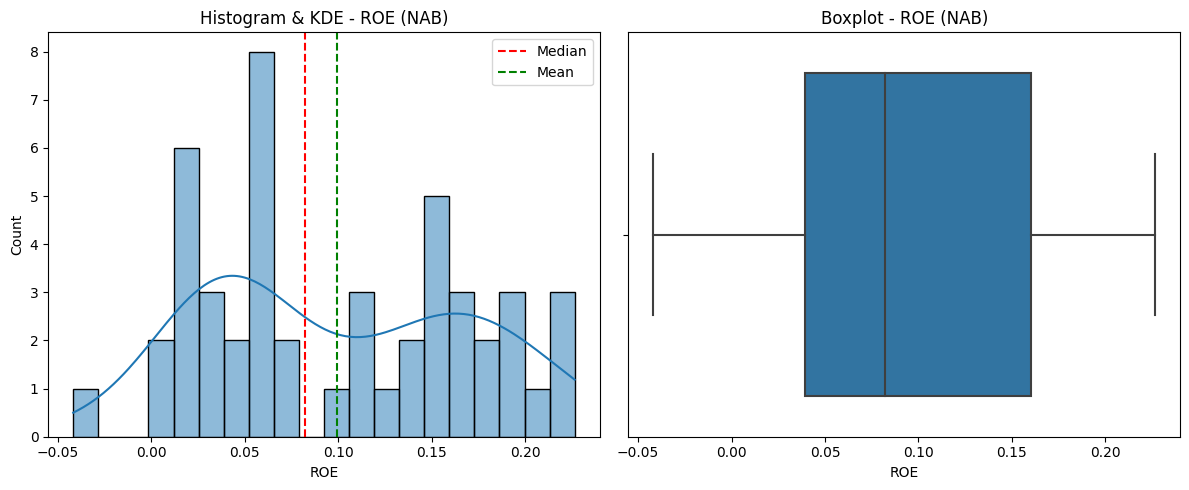

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


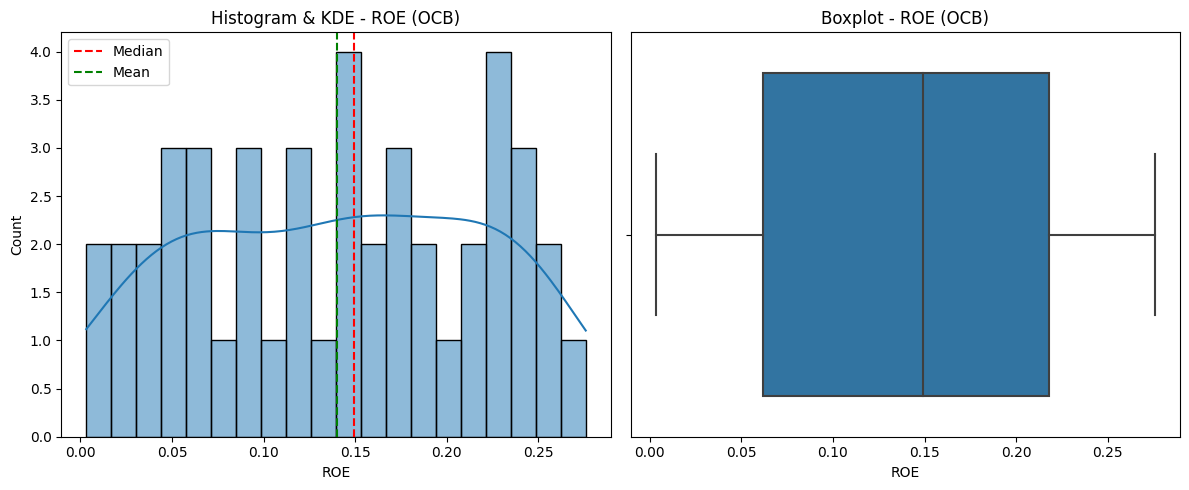

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


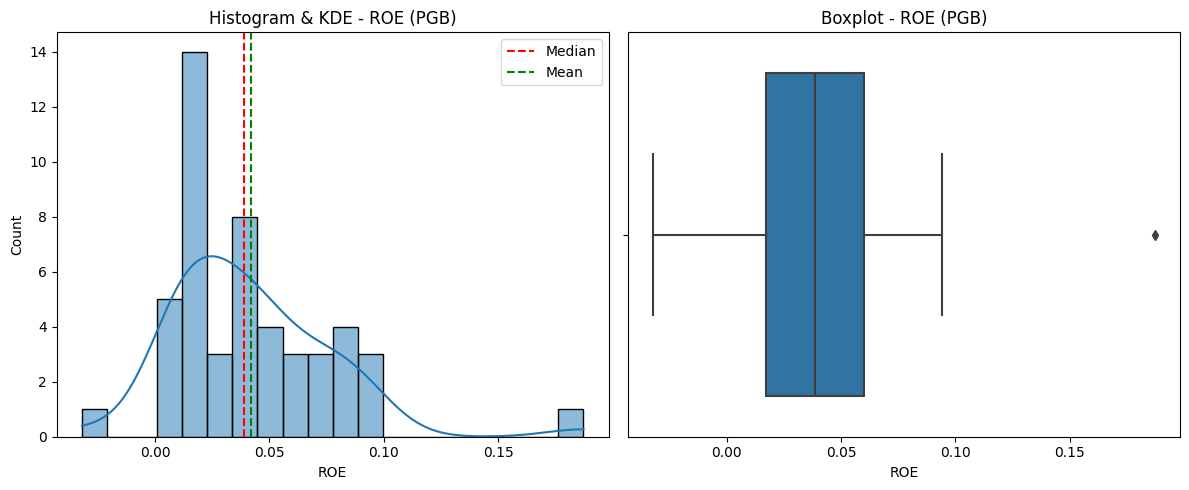

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


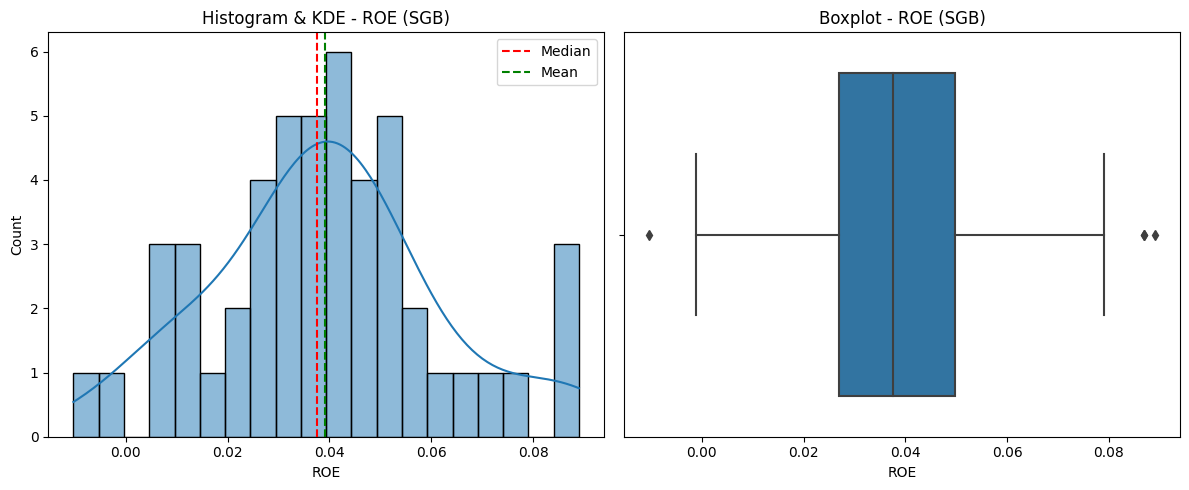

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


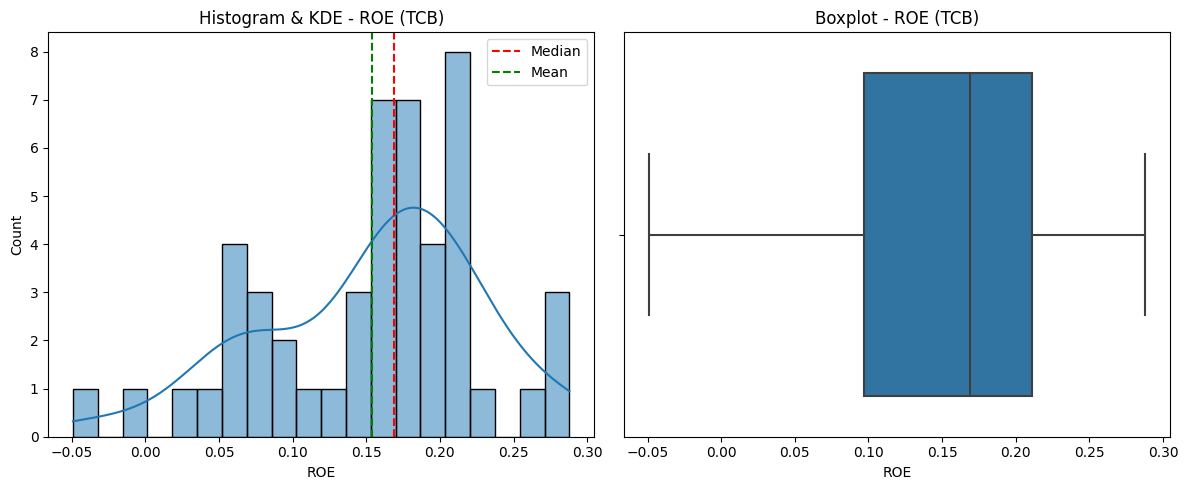

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


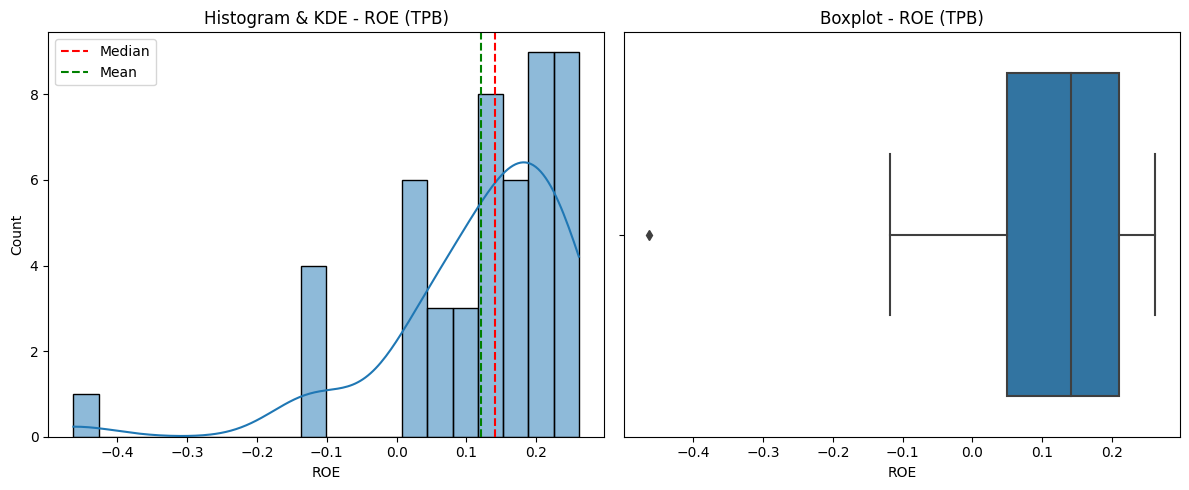

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


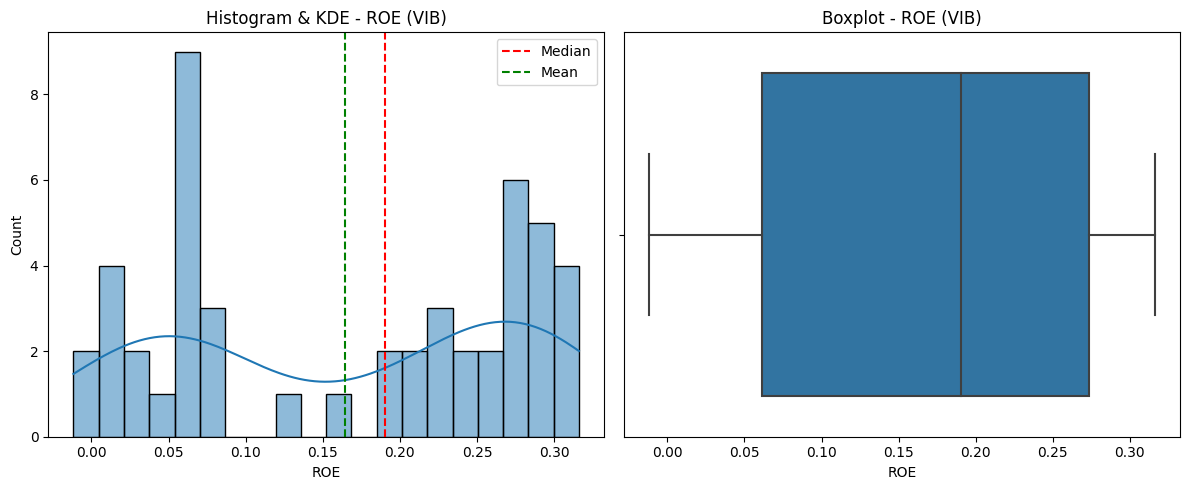

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


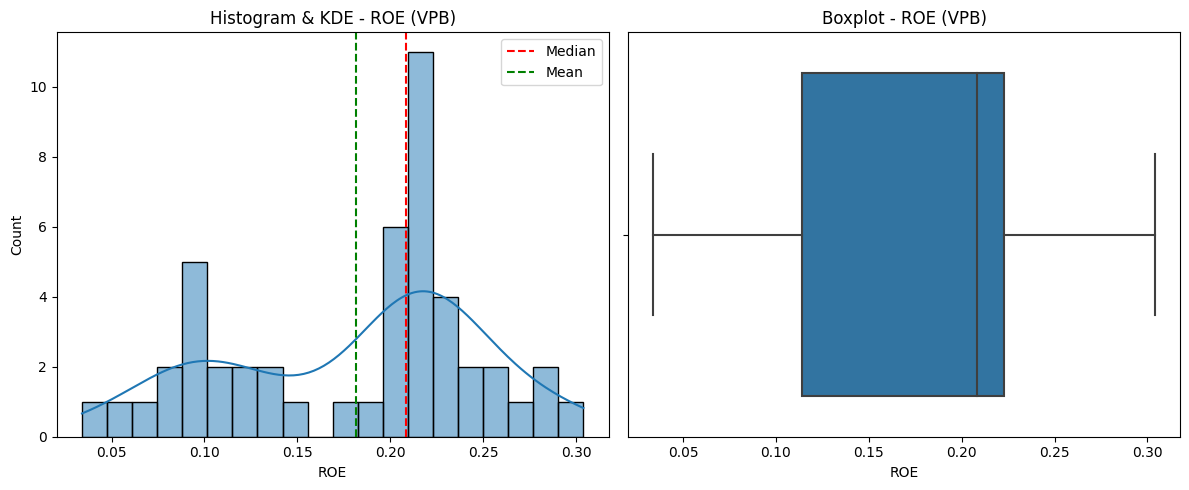


üìå Ki·ªÉm tra bi·∫øn: LDR - C√°c ng√¢n h√†ng c·∫ßn ki·ªÉm tra: ['ABB' 'BID' 'KLB' 'MSB' 'OCB' 'PGB' 'SGB' 'SSB' 'TCB' 'TPB' 'VBB' 'VIB']



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


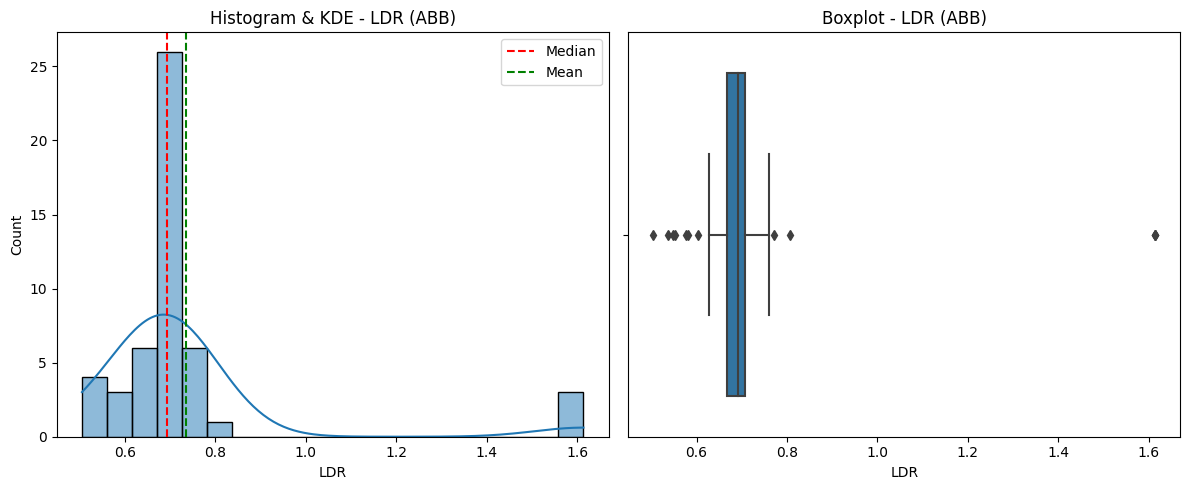

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


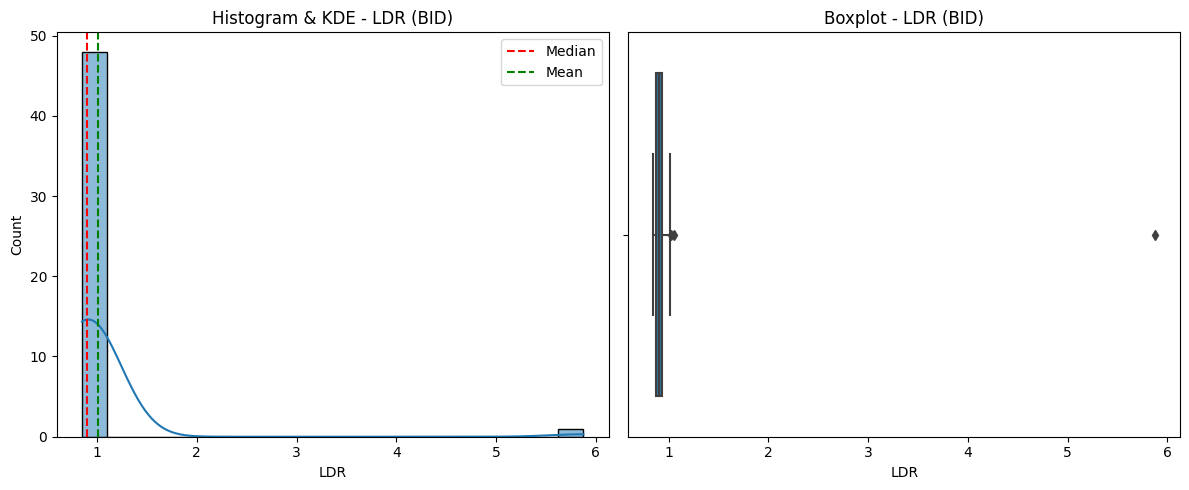

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


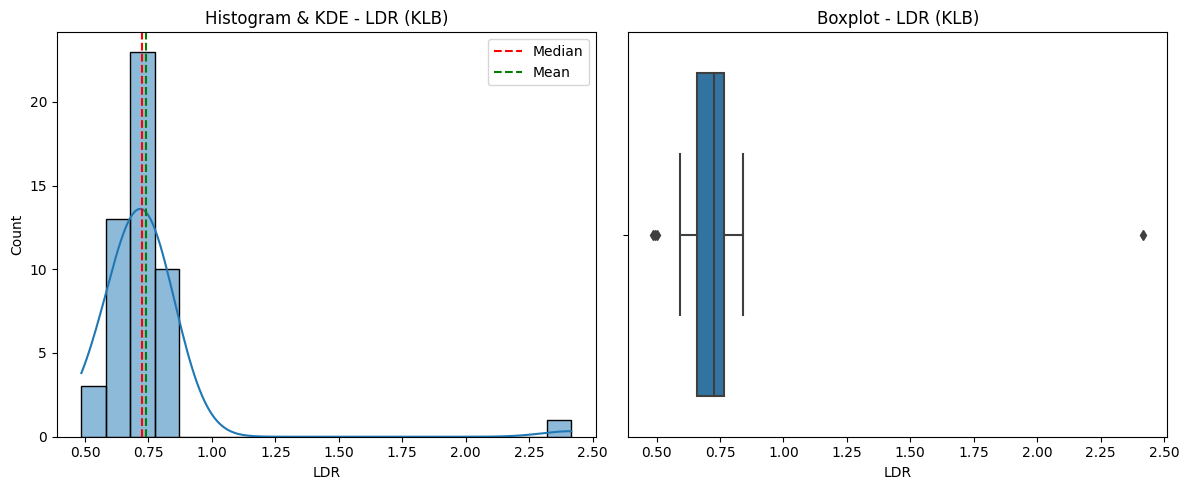

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


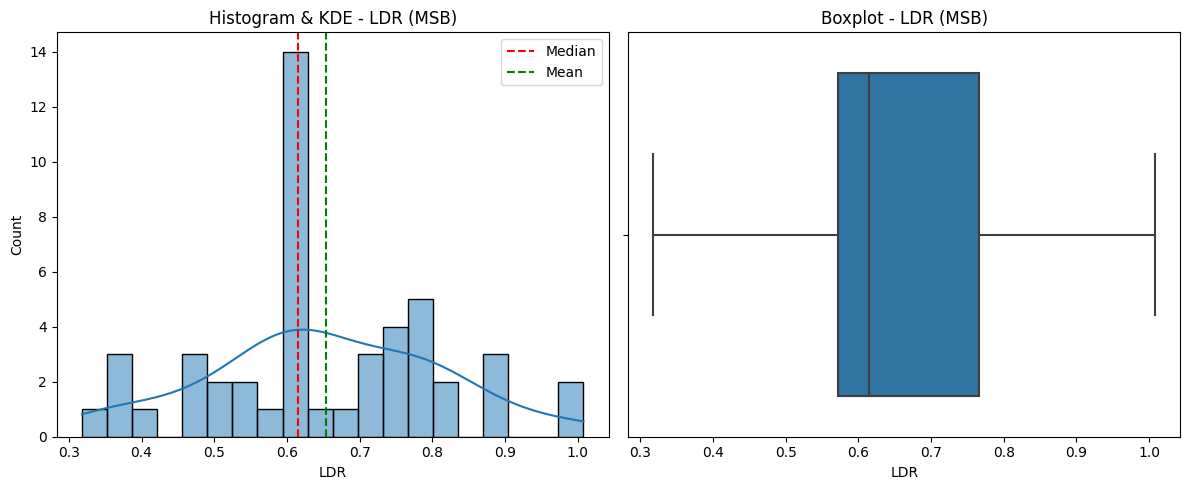

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


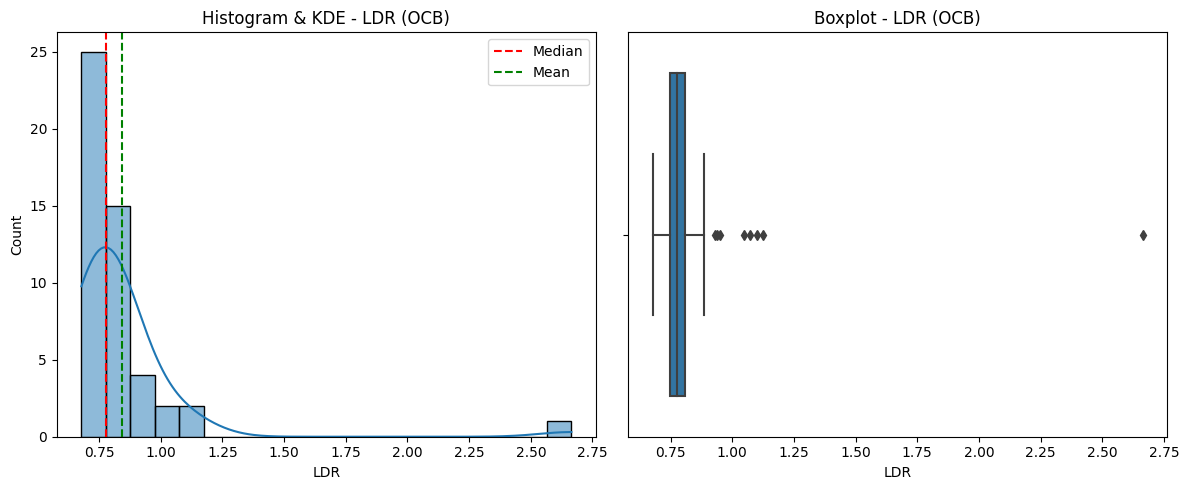

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


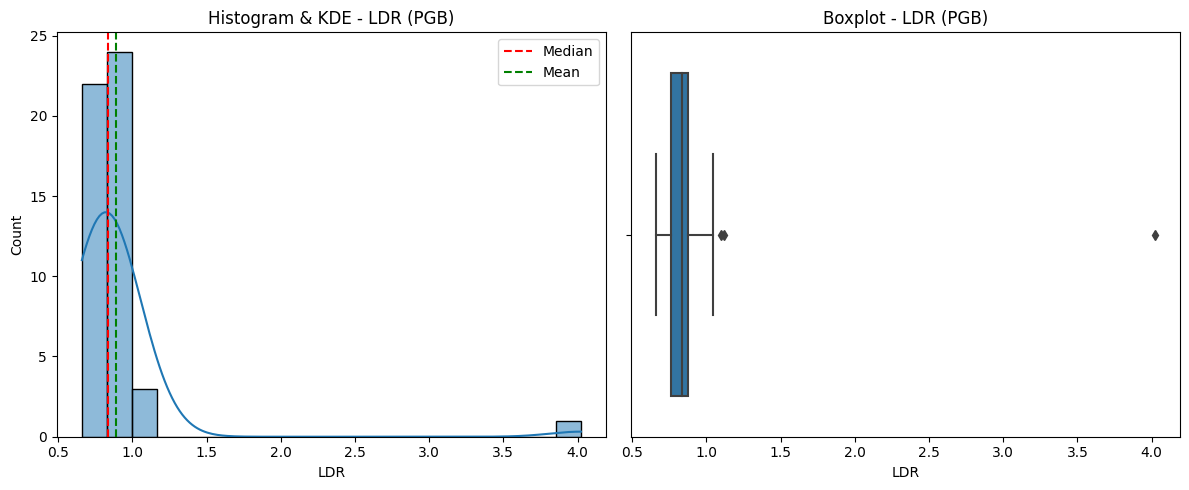

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


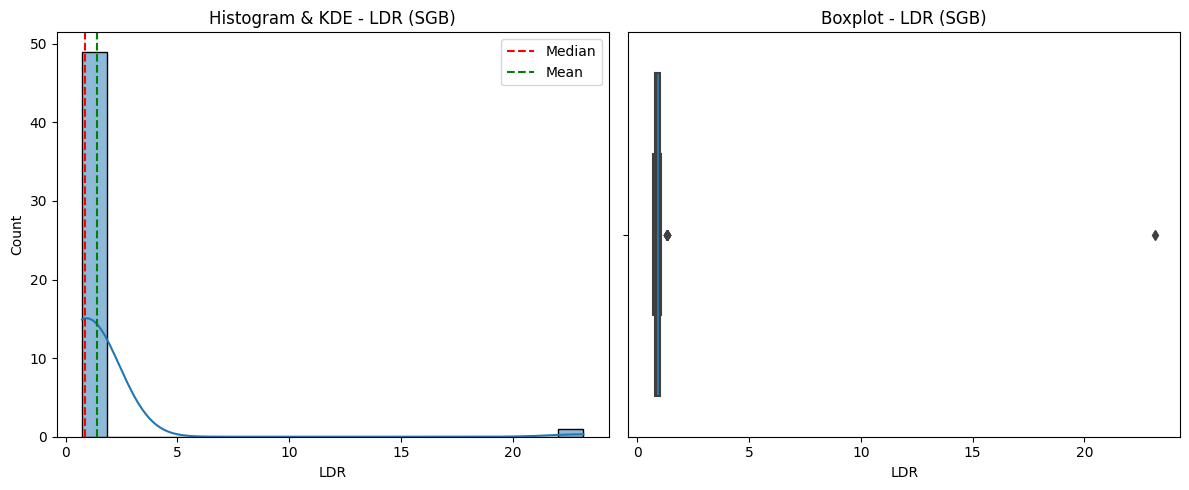

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


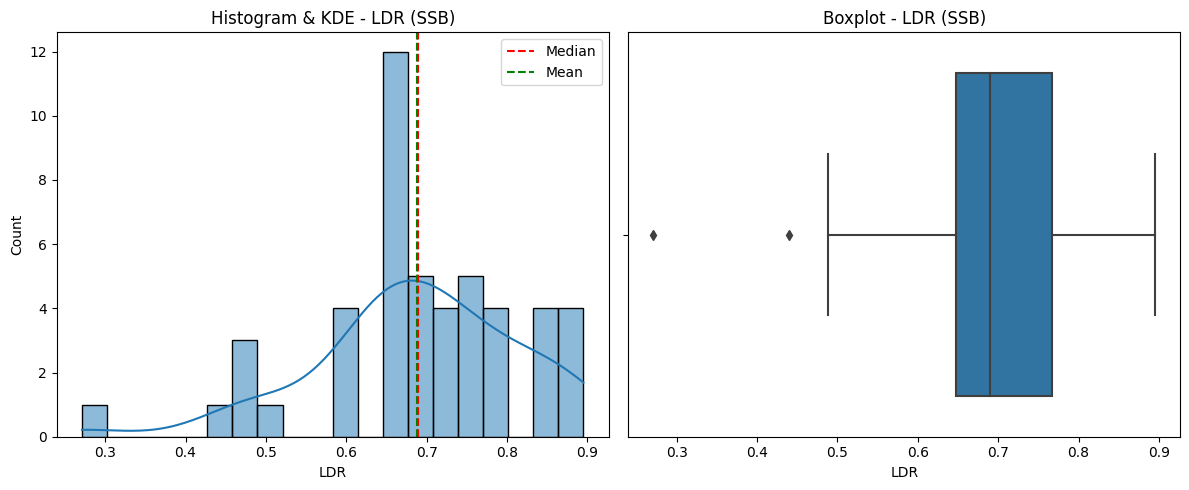

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


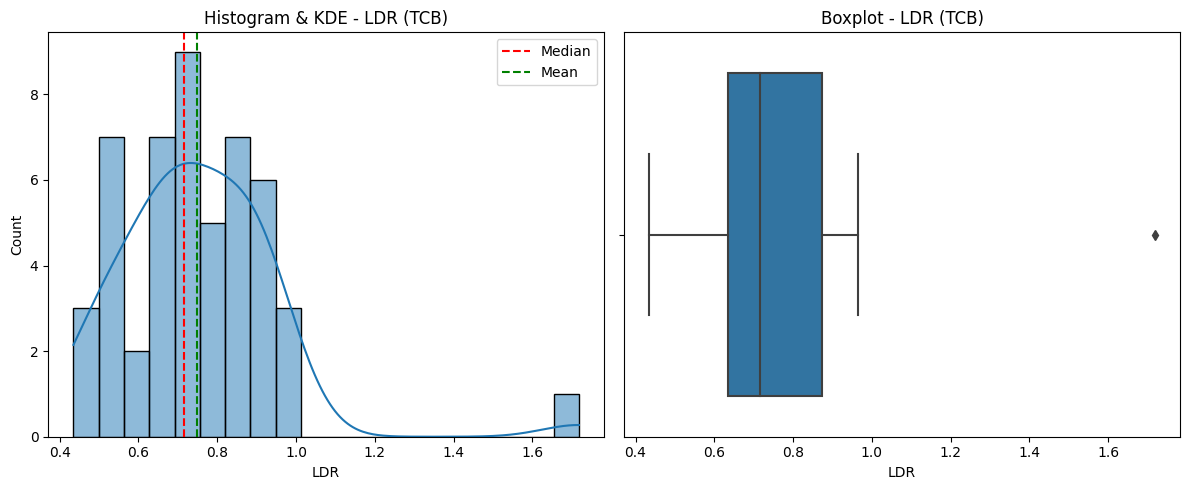

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


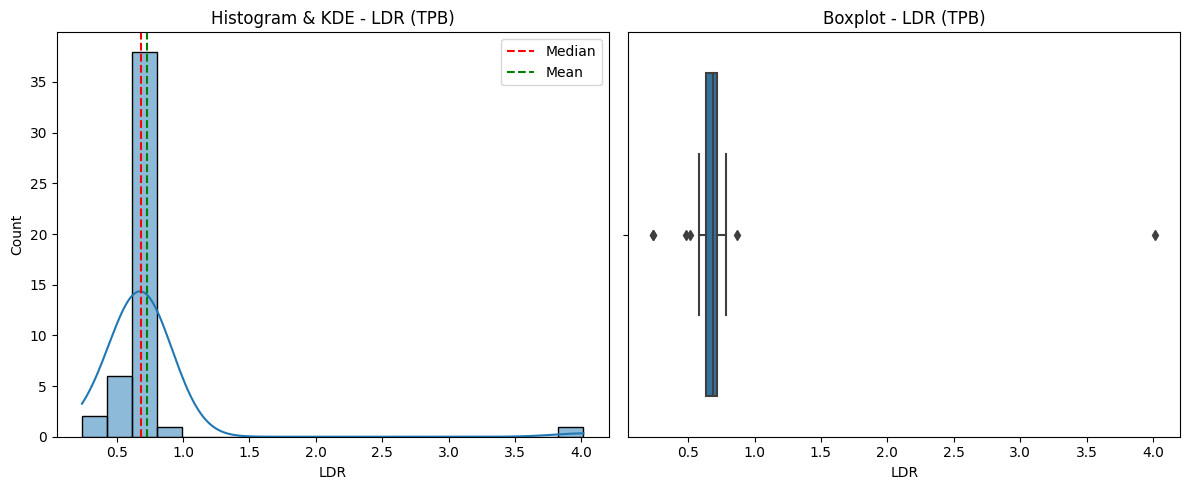

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


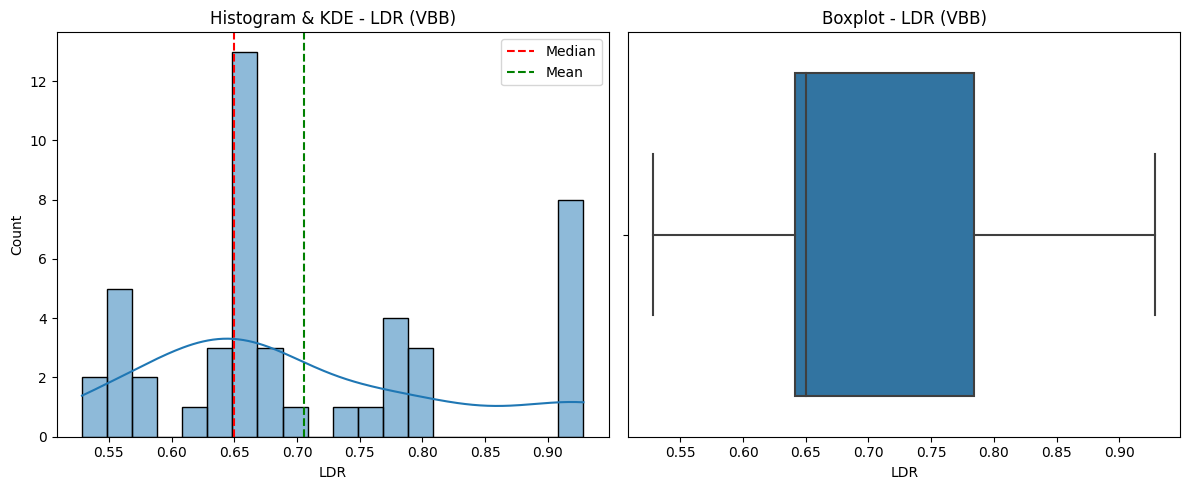

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


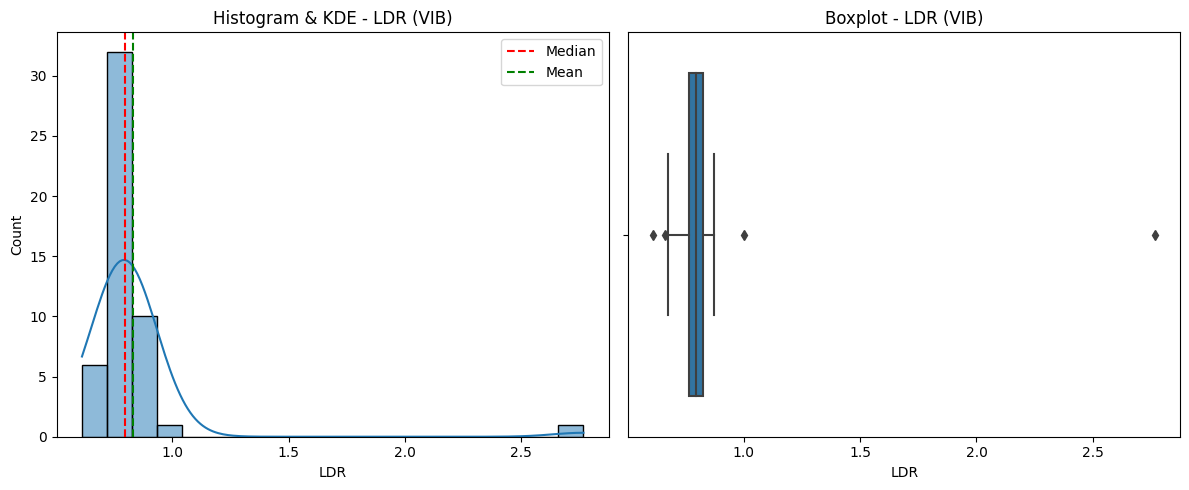

In [21]:
# T·∫°o th∆∞ m·ª•c l∆∞u ·∫£nh n·∫øu ch∆∞a c√≥
output_dir = "distribution_plots"
os.makedirs(output_dir, exist_ok=True)

# Duy·ªát qua t·ª´ng bi·∫øn
for col in cols_to_check:
    banks_with_issues = micro[micro[col].isna() | (micro[col] == 0)]['bank'].unique()
    
    print(f"\nüìå Ki·ªÉm tra bi·∫øn: {col} - C√°c ng√¢n h√†ng c·∫ßn ki·ªÉm tra: {banks_with_issues}\n")
    
    # Duy·ªát qua t·ª´ng ng√¢n h√†ng
    for bank in banks_with_issues:
        bank_data = micro[micro['bank'] == bank][col]  # D·ªØ li·ªáu c·ªßa ng√¢n h√†ng ƒë√≥

        # L·ªçc b·ªè NaN v√† 0
        valid_data = bank_data.dropna()
        valid_data = valid_data[valid_data != 0]

        if valid_data.empty:
            print(f"Ng√¢n h√†ng {bank} kh√¥ng c√≥ ƒë·ªß d·ªØ li·ªáu h·ª£p l·ªá ƒë·ªÉ v·∫Ω.")
            continue

        # V·∫Ω bi·ªÉu ƒë·ªì ph√¢n ph·ªëi
        plt.figure(figsize=(12, 5))
        
        # Histogram + KDE
        plt.subplot(1, 2, 1)
        if valid_data.nunique() > 1:
            sns.histplot(valid_data, kde=True, bins=20)
        else:
            sns.histplot(valid_data, kde=False, bins=10)
        
        plt.axvline(valid_data.median(), color='r', linestyle='dashed', label="Median")
        plt.axvline(valid_data.mean(), color='g', linestyle='dashed', label="Mean")
        plt.title(f"Histogram & KDE - {col} ({bank})")
        plt.legend()

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=valid_data)
        plt.title(f"Boxplot - {col} ({bank})")

        plt.tight_layout()
        plt.show()

        # L∆∞u ·∫£nh v√†o th∆∞ m·ª•c
        save_path = os.path.join(output_dir, f"{col}_{bank}.png")
        plt.savefig(save_path)
        plt.close()  # ƒê√≥ng figure ƒë·ªÉ tr√°nh tr√†n b·ªô nh·ªõ

In [22]:
from PIL import Image

# Th∆∞ m·ª•c ch·ª©a ·∫£nh ƒë√£ l∆∞u
image_dir = "distribution_plots"
output_pdf = "merged_distribution_plots.pdf"

# L·∫•y danh s√°ch t·∫•t c·∫£ ·∫£nh PNG trong th∆∞ m·ª•c
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(".png")]

# S·∫Øp x·∫øp file theo th·ª© t·ª± (tr√°nh l·ªôn x·ªôn)
image_files.sort()

# Ki·ªÉm tra n·∫øu c√≥ ·∫£nh ƒë·ªÉ g·ªôp
if not image_files:
    print("Kh√¥ng t√¨m th·∫•y ·∫£nh trong th∆∞ m·ª•c!")
else:
    # M·ªü ·∫£nh ƒë·∫ßu ti√™n ƒë·ªÉ t·∫°o file PDF
    first_image = Image.open(image_files[0]).convert("RGB")
    
    # M·ªü c√°c ·∫£nh c√≤n l·∫°i v√† chuy·ªÉn sang RGB
    image_list = [Image.open(img).convert("RGB") for img in image_files[1:]]

    # L∆∞u th√†nh PDF
    first_image.save(output_pdf, save_all=True, append_images=image_list)

In [23]:
# H√†m ƒëi·ªÅn gi√° tr·ªã NaN b·∫±ng trung v·ªã v√† gi√° tr·ªã 0 b·∫±ng mean
def fill_missing_values(df, col_name, special_case_banks=None):
    if special_case_banks is None:
        special_case_banks = []
    
    for bank in df['bank'].unique():
        bank_data = df[df['bank'] == bank]
        median_value = bank_data[col_name].median()
        mean_value = bank_data[col_name].mean()
        
        if bank in special_case_banks:
            df.loc[df['bank'] == bank, col_name] = mean_value
        else:
            df.loc[(df['bank'] == bank) & (df[col_name].isna()), col_name] = median_value
            df.loc[(df['bank'] == bank) & (df[col_name] == 0), col_name] = mean_value
    
    return df

if 'micro' in globals():
    variables = ["PCR", "LTA", "ROA", "ROE", "LDR"]
    special_case_banks = ["BID", "SGB"]
    for var in variables:
        special_case = special_case_banks if var == "ROE" else None
        micro = fill_missing_values(micro, var, special_case)


In [24]:
micro.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


bank  quarterly  year    time     NPL        IR     GDP     IIP  INF  \
0  ABB          1  2012  2012q1  0.0325  0.138700  0.0464  0.0650  NaN   
1  ABB          2  2012  2012q2  0.0325  0.113667  0.0480  0.0802  NaN   
2  ABB          3  2012  2012q3  0.0325  0.092067  0.0505  0.0965  NaN   
3  ABB          4  2012  2012q4  0.0290  0.093667  0.0544  0.0593  NaN   
4  ABB          1  2013  2013q1  0.0325  0.090000  0.0476  0.0516  NaN   

      CPI      UN  M2     PCR       LTA      ROA       ROE       LDR  
0  0.1415  0.0222 NaN  0.0160  0.499451  0.00740  0.065500  0.705935  
1  0.0690  0.0218 NaN  0.0153  0.399700  0.00639  0.072606  0.547300  
2  0.0648  0.0229 NaN  0.0160  0.499451  0.00740  0.065500  0.705935  
3  0.0681  0.0212 NaN  0.0221  0.398600  0.00910  0.083000  0.504700  
4  0.0664  0.0227 NaN  0.0221  0.407600  0.00880  0.083000  1.614000

In [25]:
zero_counts = (micro == 0).sum()
nan_counts = micro.isna().sum()

checking = pd.DataFrame({
    "C·ªôt": micro.columns,
    "S·ªë gi√° tr·ªã NaN": nan_counts.values,
    "S·ªë gi√° tr·ªã 0": zero_counts.values
})

checking

C·ªôt  S·ªë gi√° tr·ªã NaN  S·ªë gi√° tr·ªã 0
0        bank               0             0
1   quarterly               0             0
2        year               0             0
3        time               0             0
4         NPL               0             0
5          IR               0             0
6         GDP               0             0
7         IIP               0             0
8         INF             299             0
9         CPI               0            23
10         UN               0             0
11         M2             115             0
12        PCR               0             0
13        LTA               0             0
14        ROA               0             0
15        ROE               0             0
16        LDR               0             0

In [26]:
micro.to_csv("/kaggle/working/filled_micros.csv", index=False)